In [3]:
import numpy as np
from sklearn.manifold import TSNE
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [49]:
data = np.load("/sailhome/ethanchi/structural-probes/relationOutputs/all.npy") 
labels = np.load("/sailhome/ethanchi/structural-probes/relationOutputs/allY.npy")
extra = np.load("/sailhome/ethanchi/structural-probes/relationOutputs/all-data.npy")

print("Finished loading data.")
print(labels)
print(f"There are {np.unique(labels).shape[0]} unique labels.")
print(data.shape)


Finished loading data.
['ar-nsubj' 'ar-case' 'ar-nummod' ... 'zh-advmod' 'zh-obj' 'zh-punct']
There are 335 unique labels.
(199849, 32)


In [50]:
USE_PRECISE_LABELS = False
if not USE_PRECISE_LABELS:
  remove_colon = np.vectorize(lambda x: x if ':' not in x else x.split(':')[0])
  labels = remove_colon(labels)

In [ ]:
ES_ONLY = True
if ES_ONLY:
  is_es =

In [51]:
### TRAINING DATA

holdout_lang = "fr"

is_holdout_lang = np.vectorize(lambda x: x.startswith(holdout_lang))

train_data = data[~is_holdout_lang(labels)]
train_labels = labels[~is_holdout_lang(labels)]
train_extra = data[~is_holdout_lang(labels)]

test_data = data[is_holdout_lang(labels)]
test_labels = labels[is_holdout_lang(labels)]
test_extra = extra[is_holdout_lang(labels)]

print(f"There are {train_data.shape[0]} train examples and {test_data.shape[0]} test examples.")

There are 166667 train examples and 33182 test examples.


In [55]:
  
## REMOVE LANG INFORMATION
remove_lang_info = np.vectorize(lambda x: x.split('-')[1])
train_labels = remove_lang_info(train_labels)
test_labels = remove_lang_info(test_labels)

In [151]:
NUM_CLUSTERS = 200
TRAINING_SIZE = 20000

print(f"Training on {TRAINING_SIZE / train_data.shape[0] * 100:.3f}% of available data.")

kmeans = KMeans(n_clusters=NUM_CLUSTERS)

data_to_fit = train_data[np.random.randint(low=0, high=train_data.shape[0], size=TRAINING_SIZE)]
kmeans.fit(data_to_fit)
train_cluster_identities = kmeans.predict(train_data)
test_cluster_identities = kmeans.predict(test_data)

print("Finished training.")

Training on 12.000% of available data.
Finished training.


In [156]:
## get majority label per-cluster

clusters_to_labels = {}
clusters_to_sureness = {}
for cluster in np.unique(train_cluster_identities):
  num = np.where(train_cluster_identities == cluster)[0].shape[0]
  cluster_labels = train_labels[train_cluster_identities == cluster]
  cl_labels, counts = np.unique(cluster_labels, return_counts=True)
  best_label = cl_labels[np.argmax(counts)]
  print(f"{cluster}\t{num}", end="\t")
  top_labels = cl_labels[np.argsort(-counts)]
  top_counts = counts[np.argsort(-counts)] / num * 100
  print("\t".join(f"{top_labels[i]:<8}\t{top_counts[i]:.2f}%" for i in range(min(3, top_labels.shape[0]))), end="\t")
  sureness = top_counts[0] / top_counts[1] if top_labels.shape[0] > 1 else 3000
  print(f"{sureness:7.2f}")
  clusters_to_sureness[cluster] = sureness
  clusters_to_labels[cluster] = best_label



0	741	mark    	33.33%	cc      	24.70%	case    	12.55%	   1.35
1	475	nmod    	50.32%	obl     	18.53%	case    	6.11%	   2.72
2	1713	obj     	56.28%	obl     	11.44%	nsubj   	8.93%	   4.92
3	1054	cc      	90.13%	punct   	3.32%	nmod    	0.95%	  27.14
4	1089	case    	95.96%	advmod  	0.92%	mark    	0.64%	 104.50
5	393	punct   	42.49%	dep     	22.39%	appos   	6.62%	   1.90
6	1353	nmod    	56.02%	compound	10.20%	obj     	7.24%	   5.49
7	939	nsubj   	88.07%	nmod    	2.56%	obj     	1.70%	  34.46
8	810	cc      	90.25%	conj    	3.95%	mark    	0.86%	  22.84
9	1113	punct   	97.66%	mark    	1.71%	cc      	0.18%	  57.21
10	1213	compound	33.97%	case    	23.41%	nmod    	21.43%	   1.45
11	1231	mark    	73.11%	punct   	12.19%	fixed   	4.96%	   6.00
12	895	punct   	98.88%	parataxis	0.56%	nmod    	0.22%	 177.00
13	904	advmod  	42.26%	obl     	28.43%	nmod    	7.63%	   1.49
14	849	nsubj   	65.72%	nmod    	12.60%	obj     	4.59%	   5.21
15	743	nsubj   	77.52%	obl     	4.98%	nmod    	3.36%	  15.57
16	799	nmod    

['punct' 'det' 'advmod' ... 'det' 'nmod' 'punct']
['punct' 'det' 'appos' ... 'det' 'obl' 'punct']
Test Accuracy: 67.217%
0	  1.35    22.12%
1	  2.72    57.89%
2	  4.92    60.69%
3	 27.14    94.74%
4	104.50    95.82%
5	  1.90    24.24%
6	  5.49    77.30%
7	 34.46    93.85%
8	 22.84    91.18%
9	 57.21    88.40%
10	  1.45     0.00%
11	  6.00    51.32%
12	177.00   100.00%
13	  1.49    50.00%
14	  5.21    49.71%
15	 15.57    87.25%
16	  1.85     6.35%
17	  2.22    70.67%
18	  1.64    53.39%
19	  2.63    38.76%
20	  6.63    53.06%
21	 72.33   100.00%
22	795.00   100.00%
23	  1.38     0.00%
24	  1.74    25.41%
25	  1.33    42.67%
26	751.50   100.00%
27	  2.52    60.00%
28	 96.58    97.49%
29	  2.31    20.69%
30	  1.79    29.41%
31	  2.75    37.39%
32	  2.13    46.15%
33	  1.15    36.97%
34	  1.02     4.65%
35	 30.18    95.98%
36	208.50    94.59%
37	  3.62    56.55%
38	198.00    97.48%
39	 21.68    90.48%
40	  1.33     0.00%
41	  1.50    27.27%
42	215.60    98.47%
43	 39.83     0.00%
44	  5.16

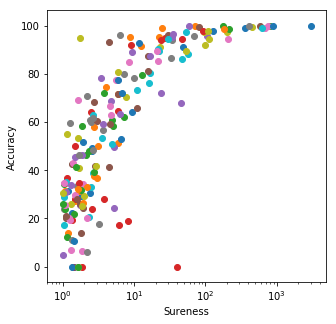

In [158]:
identity_to_label = np.vectorize(lambda x: clusters_to_labels[x])
predicted_labels = identity_to_label(test_cluster_identities)
print(predicted_labels)
print(test_labels)

numRight = len(np.where(predicted_labels == test_labels)[0])
totalNum = predicted_labels.shape[0]
accuracy = numRight / totalNum * 100

print(f"Test Accuracy: {accuracy:.3f}%")


plt.figure(figsize=(5, 5))
plt.xscale("log")
for cluster in np.unique(train_cluster_identities):
  try:
    cluster_accuracy = len(np.where((test_cluster_identities == cluster) & (predicted_labels == test_labels))[0]) / len(np.where(test_cluster_identities == cluster)[0]) * 100
  except ZeroDivisionError:
    continue
  print(f"{cluster}\t{clusters_to_sureness[cluster]:6.2f} {cluster_accuracy:8.2f}%")
  plt.scatter(clusters_to_sureness[cluster], cluster_accuracy)

plt.xlabel('Sureness')
plt.ylabel('Accuracy')
plt.show()

In [57]:
unique_labels, counts = np.unique(labels, return_counts=True)

mapping = dict(zip(unique_labels, counts))
mapping = sorted(mapping.items(), key=lambda kv: -kv[1])
print("\n".join("\t".join(str(y) for y in x) for x in mapping))

remove_langs = np.vectorize(lambda x: x.replace('en-', '').replace('fr-', ''))
base_labels = remove_langs(labels)

base_unique_labels, base_counts = np.unique(base_labels, return_counts=True)

base_mapping = dict(zip(base_unique_labels, base_counts))
base_mapping = sorted(base_mapping.items(), key=lambda kv: -kv[1])
print("\n".join("\t".join(str(y) for y in x) for x in base_mapping))


punct	25421
case	24792
nmod	20751
det	16432
nsubj	14222
obl	12052
amod	11691
obj	9838
advmod	8311
conj	7346
cc	6963
mark	5780
acl	4614
flat	4479
aux	3816
nummod	3401
compound	3216
cop	2933
appos	2340
advcl	2272
xcomp	2137
ccomp	2123
fixed	1578
parataxis	782
dep	776
iobj	404
expl	332
csubj	274
clf	200
discourse	184
root	116
list	75
orphan	72
goeswith	47
vocative	42
dislocated	28
reparandum	9
punct	25421
case	24792
nmod	20751
det	16432
nsubj	14222
obl	12052
amod	11691
obj	9838
advmod	8311
conj	7346
cc	6963
mark	5780
acl	4614
flat	4479
aux	3816
nummod	3401
compound	3216
cop	2933
appos	2340
advcl	2272
xcomp	2137
ccomp	2123
fixed	1578
parataxis	782
dep	776
iobj	404
expl	332
csubj	274
clf	200
discourse	184
root	116
list	75
orphan	72
goeswith	47
vocative	42
dislocated	28
reparandum	9


In [20]:
print(cluster_identities[labels == 'en-nsubj'])
print(cluster_identities[labels == 'en-nsubj'].shape)
print(np.bincount(cluster_identities[labels == 'en-nsubj']))

u_labels, counts = np.unique(cluster_identities, return_counts=True)
print(dict(zip(u_labels, counts)))

for label in np.unique(labels):
  print("{: <10}".format(label), end="\t")
  print("".join(["{:4d}".format(x) for x in np.bincount(cluster_identities[labels == label], minlength=NUM_CLUSTERS)]))

[17 61 52 ... 61 61 63]
(2143,)
[  8  13  11   2   3   0   3   0   2   0   0  30   0   2   1  32   5  58
  16  16  15   0   2   0   1   9  27 100   5  30  14  20   1  27  36   0
   0   2  38  15   5   0   5  14   2  17   0   0   9   4   8   0   4   4
   1  13   6   1   9  84   0 430   2 946   0   0   9  12  14]
{0: 1742, 1: 3326, 2: 4391, 3: 4055, 4: 3306, 5: 1779, 6: 3433, 7: 2110, 8: 2213, 9: 2007, 10: 2390, 11: 2726, 12: 4074, 13: 3040, 14: 2347, 15: 3236, 16: 3174, 17: 5028, 18: 3213, 19: 3269, 20: 1428, 21: 2189, 22: 3399, 23: 3959, 24: 2093, 25: 2481, 26: 2336, 27: 2948, 28: 2709, 29: 3147, 30: 1918, 31: 2844, 32: 2911, 33: 2811, 34: 1993, 35: 3915, 36: 1615, 37: 2495, 38: 2676, 39: 3111, 40: 1003, 41: 3126, 42: 1008, 43: 1991, 44: 3270, 45: 3377, 46: 5970, 47: 2390, 48: 1561, 49: 2347, 50: 2583, 51: 2365, 52: 3304, 53: 1923, 54: 5028, 55: 4236, 56: 4113, 57: 2357, 58: 3968, 59: 2383, 60: 439, 61: 4231, 62: 2097, 63: 2885, 64: 3206, 65: 1631, 66: 3517, 67: 3404, 68: 3834, 69: 246

en-obj    	   3 159  17   2   3   0   3   0   8   1   0   8  11   0   0  30  21 487   3  28   0   0   3   1   0   7   3  10   6  82  44   4   0   3   0   0   0   3   3   3   0   0   0   0   6  63   0   2   6   8   3  10   6   2   0   9   1   4  13   3   0   8   3  13   0   0  72   5  41   0
en-obl    	   5  45  19   1   3   7   0   0   4   3   0  47   0   1  11  55  69  61   3  16  12   0  17   0  10   3  11   6   3  77  23  14  10  15  13   1   0   2  22   3   2   0   4   0  52  54   1   1   4  28   5  31  10  34   2   7   3  27  13   0   0   4  56   6  16   9  62  14 114   0
en-orphan 	   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
en-parataxis	   1   2   0   0   0  18   0   0   0   0   1   0   1   2   0   1  32   0   0   1   3   0   1   0  66   1   0   

fr-dislocated	   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
fr-expl   	   0   1   0   0   1   0   0   0   1   0   0   0   0   0   0   1   0   1   0   0   0   0   6   0   0   0   0   0   0   0   4   0   2  44   0   0   0   0   0   0   0   0   0   0   1   0  50  68   2   0   0   0   0   0   0   0   0   1   0   0   0   0   0   1   0   0   0   0   0   0
fr-fixed  	   0  47   2   0   2   0   1   0  46   0   0   2   5   0   9   0   0   2   0   0   0   0   3   6   0  11   0   3   7   0   8   0   4   1   0   0   0   1   1   3   0   0   0   0   0   6   2  44  10   0  18   1   2   2   0   2   2   0  30   0   0   0   4   7   2   0   1   1   0   1
fr-flat   	   2  38  19  12   0   0   1   0   0   0   0   5   1   0   2   4   1   4   0   0   0   0   0   0   0   2   2  

In [ ]:
## DEPENDENCY PARSER



In [22]:
NUM_TO_DRAW = 100

for cluster in u_labels:
  word_pairs = pairs_data[kmeans.labels_ == cluster]
  print("Cluster {} ({} words)".format(cluster, word_pairs.shape[0]))
  print(kmeans.cluster_centers_[cluster])
  trimmedLabels = labels[kmeans.labels_ == cluster]
  cluster_labels, counts = np.unique(trimmedLabels, return_counts=True)
  print(dict([kv for kv in zip(cluster_labels, counts) if kv[1] > 20]))
  pca = PCA(n_components=2)
  pca_data = pca.fit_transform(word_pairs.reshape(-1, 32))
  print(np.sum(pca.explained_variance_))
  pca_data = pca_data.reshape(-1, 2, 2)
  

  plt.figure(figsize=(10, 10))

  is_src = np.vectorize(lambda x: 'en' in x)
  is_dest = np.vectorize(lambda x: 'fr' in x)

  
  to_draw_src = pca_data[is_src(trimmedLabels)]
  to_draw_dest = pca_data[is_dest(trimmedLabels)]

  indices_to_examine_src = np.random.randint(to_draw_src.shape[0], size=NUM_TO_DRAW)
  indices_to_examine_dest = np.random.randint(to_draw_dest.shape[0], size=NUM_TO_DRAW)
  
  to_draw_src = to_draw_src[indices_to_examine_src]
  to_draw_dest = to_draw_dest[indices_to_examine_dest]
  
  
  for row in to_draw_src:
    plt.arrow(row[0][0], row[0][1], row[1][0] - row[0][0], row[1][1] - row[0][1], color='green', head_width=0.025, head_length=0.05, alpha=0.25)
  for row in to_draw_dest:
    plt.arrow(row[0][0], row[0][1], row[1][0] - row[0][0], row[1][1] - row[0][1], color='blue', head_width=0.025, head_length=0.05, alpha=0.1)
  
  plt.scatter(to_draw_src[:, 0, 0], to_draw_src[:, 0, 1], c='r', label='en-subj', s=10, alpha=1)
  plt.scatter(to_draw_src[:, 1, 0], to_draw_src[:, 1, 1], c='green', label='en-verb', s=10, alpha=1)

  plt.scatter(to_draw_dest[:, 0, 0], to_draw_dest[:, 0, 1], c='purple', label='fr-subj', s=10, alpha=1)
  plt.scatter(to_draw_dest[:, 1, 0], to_draw_dest[:, 1, 1], c='blue', label='fr-verb', s=10, alpha=1)

  plt.show()
    
    
pca_data = pca_data.reshape(-1, 2, 2)

# ROW_TO_CHECK = 57
# pca_first_test = pca.transform(trimmedData[ROW_TO_CHECK][1].reshape(1, -1)).squeeze()
# assert np.allclose(pca_first_test, pca_data[ROW_TO_CHECK][1])

print(pca_data.shape)

NameError: name 'pairs_data' is not defined

In [33]:
kmeans_all = KMeans(n_clusters=NUM_CLUSTERS)

kmeans_all.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=70, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)